__Analysis on Zomato orders__

In [6]:
# Step1: Importing necessary python libraries
import pandas as pd
import numpy as np


In [7]:
!pip install matplotlib
!pip install seaborn

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Zomato_data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [11]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [13]:
df.shape

(148, 7)

In [14]:
# convert rate dtype to float
def handleRate(value):
    value = str(value).split('/')
    value=value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

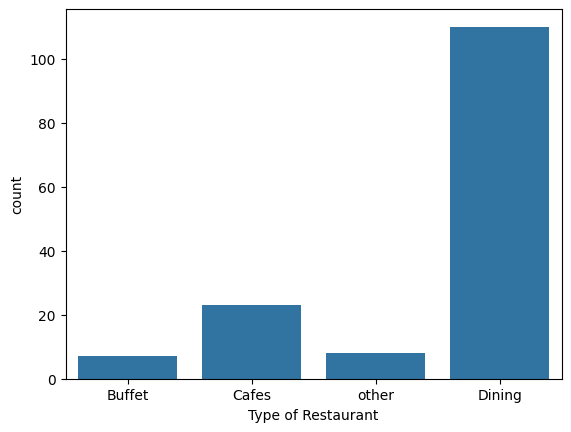

In [16]:
# let's explore the listed_in(type) column
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

# this states that majority of the restaurants fall into the dining category

Text(0, 0.5, 'votes')

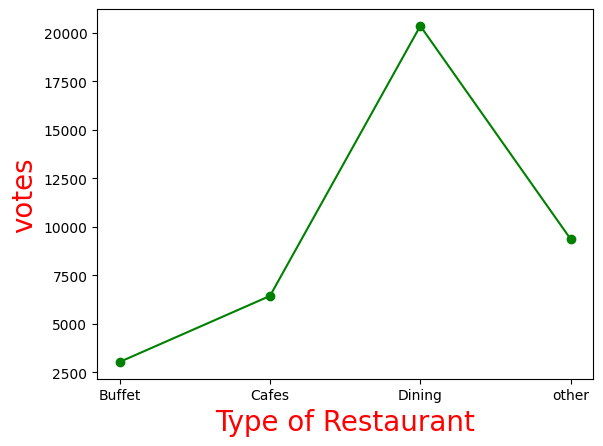

In [19]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker = 'o')
plt.xlabel("Type of Restaurant", c ="red", size=20)
plt.ylabel("votes", c="red", size=20)

# Dining restaurants are liked by a large no. of individuals

In [22]:
# Now, we will determine the restaurant's name on the based of maximum votes given by customers

max_votes = df['votes'].max()
restro_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print(f"{restro_with_max_votes} have maximum votes")

38    Empire Restaurant
Name: name, dtype: object have maximum votes


<Axes: xlabel='online_order', ylabel='count'>

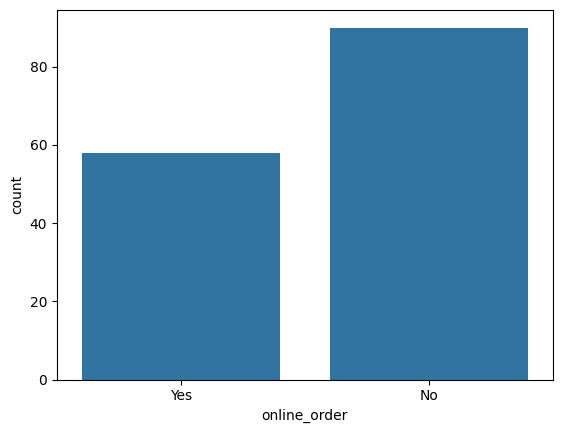

In [58]:
# Exploring another column called online_order

sns.countplot(x=df['online_order'])

In [ ]:
# this states that the majority of the restaurants don't accept online orders

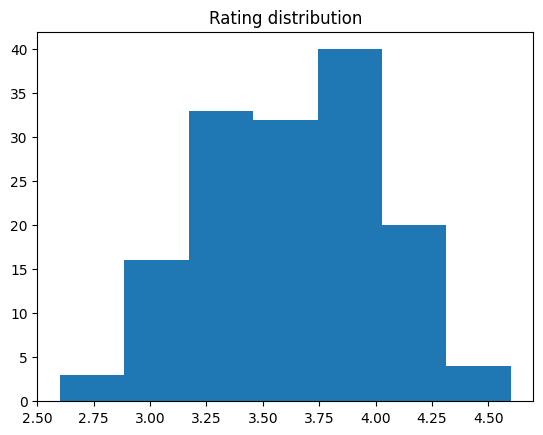

In [29]:
# Let's explore the rate column

plt.hist(df['rate'],bins=7)
plt.title('Rating distribution')
plt.show()

# the majority of the restaurants have rating between 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

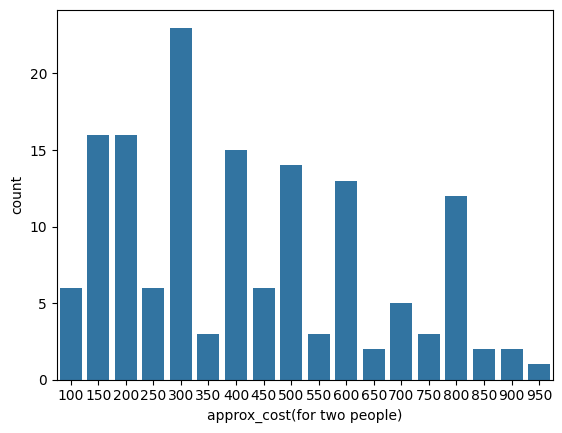

In [34]:
# Exploring approx_cost(for two people) column

approx_cost = df['approx_cost(for two people)']
sns.countplot(x=approx_ost)

# The majority of couples prefer restaurants with an approximate cost of 300 rupees.



<Axes: xlabel='online_order', ylabel='rate'>

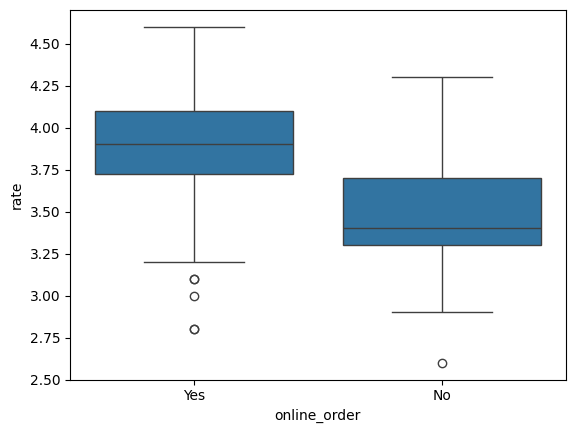

In [36]:
# we will examine whether online order receives higher ratings than offline orders

sns.boxplot(x='online_order', y ='rate', data=df)

# Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

<Axes: xlabel='online_order', ylabel='rate'>

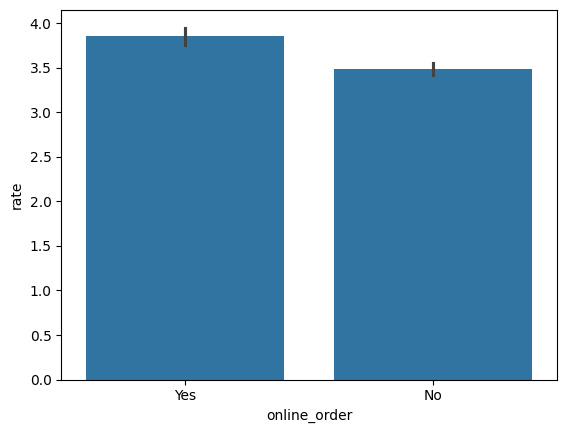

In [43]:
sns.barplot(x='online_order', y='rate', data= df)

In [44]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


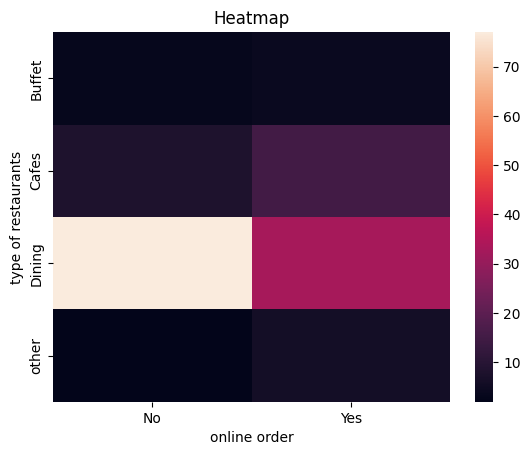

In [56]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

sns.heatmap(pivot_table)
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('type of restaurants')

plt.show()

# Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.
# This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.